<a href="https://colab.research.google.com/github/aditigedam/ML/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

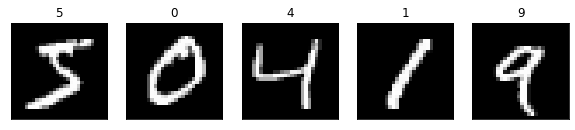

In [ ]:
fig, axes = plt.subplots(ncols=5,sharex = False, sharey = True, figsize = (10,4))
for i in range(5):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()  

In [ ]:
to_categorical(2,num_classes=10)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
temp = []
for i in range(len(y_train)):
  temp.append(to_categorical(y_train[i],num_classes=10))
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):
  temp.append(to_categorical(y_test[i],num_classes=10))
y_test = np.array(temp) 

In [ ]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(y_train.shape," ",y_test.shape)

(60000, 10)   (10000, 10)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(5,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 3925      
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])


In [ ]:
model.fit(x_train,y_train,epochs =5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6033 - acc: 0.4879 - val_loss: 1.2904 - val_acc: 0.6208
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1788 - acc: 0.6246 - val_loss: 1.0544 - val_acc: 0.6751
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0107 - acc: 0.6786 - val_loss: 0.9693 - val_acc: 0.6951
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9386 - acc: 0.7044 - val_loss: 0.8926 - val_acc: 0.7244
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9017 - acc: 0.7246 - val_loss: 0.8561 - val_acc: 0.7435


In [ ]:
prediction = model.predict(x_test)
prediction

array([[5.19225840e-03, 1.64985220e-04, 6.64525060e-03, ...,
        8.90023530e-01, 8.22913088e-03, 3.80861051e-02],
       [9.91616771e-02, 1.41288918e-02, 4.17144239e-01, ...,
        1.86742842e-03, 1.62233770e-01, 3.81333404e-04],
       [1.02769875e-03, 8.90230775e-01, 2.01970097e-02, ...,
        2.69879960e-03, 7.37465397e-02, 5.82758943e-03],
       ...,
       [1.28403743e-04, 8.92179727e-04, 3.18551995e-03, ...,
        3.73375602e-02, 1.28773794e-01, 1.15658455e-01],
       [9.91616771e-02, 1.41288918e-02, 4.17144239e-01, ...,
        1.86742842e-03, 1.62233770e-01, 3.81333404e-04],
       [1.18308939e-01, 2.32072707e-05, 3.60311791e-02, ...,
        2.44345795e-03, 4.14446881e-03, 8.37719254e-03]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction, axis=1)
print(prediction)

[7 2 1 ... 4 2 6]


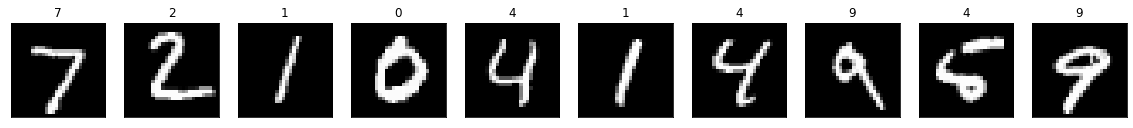

In [ ]:
fig, axes = plt.subplots(ncols=10,sharex = False, sharey = True, figsize = (20,4))
for i in range(10):
  axes[i].set_title(prediction[i])
  axes[i].imshow(x_test[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()  